# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [ ]:
# Your code to explore the data

In [3]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [4]:
df_flights.shape

(271940, 20)

In [5]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [6]:
def check_delay(val):
    if val >=15:
        return 1
    else:
        return 0

In [7]:
df_flights['DepDel15'] = df_flights['DepDelay'].apply(check_delay)

In [8]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

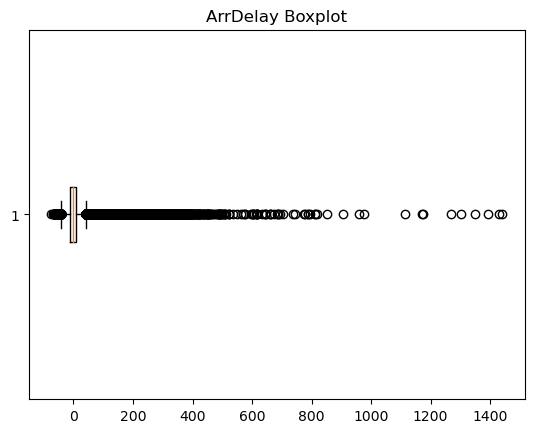

In [10]:
plt.boxplot(df_flights['ArrDelay'] , vert=False) 
plt.title('ArrDelay Boxplot') 
plt.show()

In [11]:
df_flights['ArrDelay'].describe()

count    271940.000000
mean          6.496650
std          38.230331
min         -75.000000
25%         -11.000000
50%          -3.000000
75%          10.000000
max        1440.000000
Name: ArrDelay, dtype: float64

In [31]:
min_arrdelay_quantile = df_flights['ArrDelay'].quantile(0.01)
print(min_arrdelay_quantile)

-33.0


In [32]:
max_arrdelay_quantile = df_flights['ArrDelay'].quantile(0.99)
print(max_arrdelay_quantile)

126.0


In [35]:
df_flights[df_flights['ArrDelay'] >=max_arrdelay_quantile].shape[0]  

2678

In [36]:
df_flights[df_flights['ArrDelay'] <=min_arrdelay_quantile].shape[0]  

2684

In [37]:
df_flights.shape

(267487, 20)

In [38]:
df_flights = df_flights[(df_flights['ArrDelay'] >= min_arrdelay_quantile) & (df_flights['ArrDelay'] <= max_arrdelay_quantile)]

In [39]:
df_flights.shape

(262649, 20)

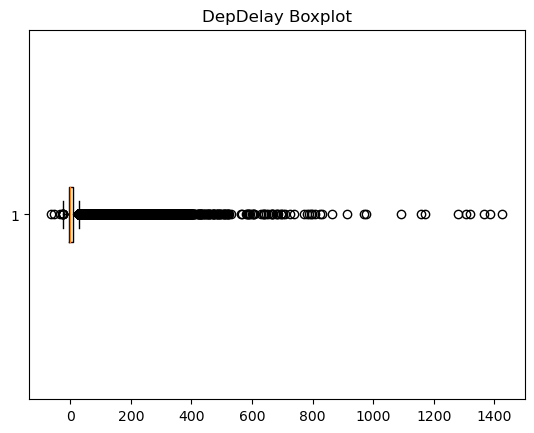

In [14]:
plt.boxplot(df_flights['DepDelay'], vert=False) 
plt.title('DepDelay Boxplot') 
plt.show()

In [15]:
df_flights['DepDelay'].describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [23]:
min_depdelay_quantile = df_flights['DepDelay'].quantile(0.01)
print(min_depdelay)

-12.0


In [17]:
df_flights[df_flights['DepDelay'] <=min_depdelay].shape[0]

2878

In [25]:
max_depdelay_quantile = df_flights['DepDelay'].quantile(0.99)
print(max_depdelay_quantile)

166.0


In [19]:
df_flights[df_flights['DepDelay'] <=166]['Cancelled'].value_counts()

Cancelled
0    266339
1      2903
Name: count, dtype: int64

In [20]:
df_flights[df_flights['DepDelay'] >=166].shape[0]

2743

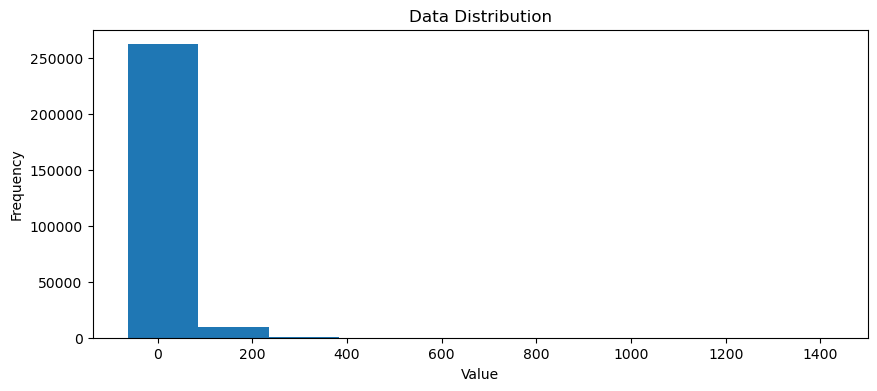

In [21]:
var_data = df_flights['DepDelay']

plt.figure(figsize=(10,4))

plt.hist(var_data)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [22]:
# we can do like removing the rows where the departure time is more then 166 there are around

In [26]:
df_flights.shape

(271940, 20)

In [29]:
df_flights = df_flights[(df_flights['DepDelay'] >= min_depdelay_quantile) & (df_flights['DepDelay'] <= max_depdelay_quantile)]

In [30]:
df_flights.shape

(267487, 20)

In [44]:
Q1 = df_flights['DepDelay'].quantile(0.25)
print("Q1: " , Q1)

Q3 = df_flights['DepDelay'].quantile(0.75)
print("Q1: " , Q3)

IQR = Q3 - Q1
print("IQR: ", IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Q1:  -4.0
Q1:  8.0
IQR:  12.0
Lower Bound:  -22.0
Upper Bound:  26.0


In [45]:
df_flights[df_flights['DepDelay'] >= upper_bound].shape[0]

31862

In [46]:
df_flights.shape[0] - 31862

230787

In [47]:
df_flights = df_flights[(df_flights['DepDelay'] >= lower_bound) & (df_flights['DepDelay'] <= upper_bound)]

In [48]:
Q1 = df_flights['ArrDelay'].quantile(0.25)
print("Q1: " , Q1)

Q3 = df_flights['ArrDelay'].quantile(0.75)
print("Q1: " , Q3)

IQR = Q3 - Q1
print("IQR: ", IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Q1:  -12.0
Q1:  3.0
IQR:  15.0
Lower Bound:  -34.5
Upper Bound:  25.5


In [49]:
df_flights[df_flights['ArrDelay'] >= upper_bound].shape[0]

7314

In [50]:
df_flights = df_flights[(df_flights['ArrDelay'] >= lower_bound) & (df_flights['ArrDelay'] <= upper_bound)]

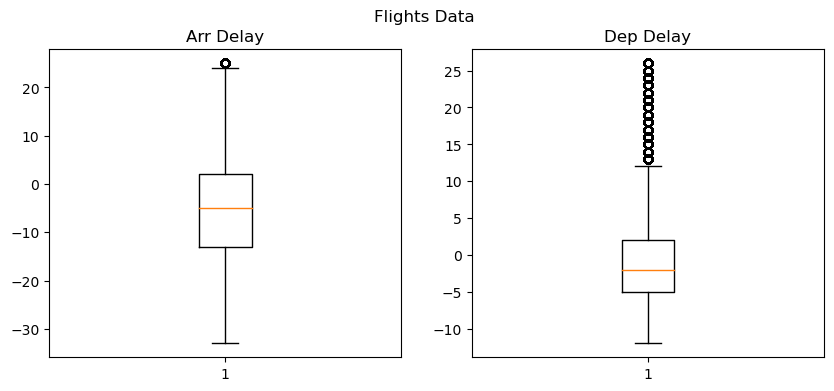

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].boxplot(df_flights['ArrDelay'])
ax[0].set_title('Arr Delay')

ax[1].boxplot(df_flights['DepDelay'])
ax[1].set_title('Dep Delay')

plt.suptitle('Flights Data')
plt.show()

In [52]:
df_flights.shape

(224498, 20)

In [53]:
# Summary statistics for the numerical data 

In [54]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,224498.0,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000,224498.000000
mean,2013.0,7.021965,15.801205,3.903674,12756.842359,12735.068437,1288.075894,0.059952,0.066887,1470.014642,-4.706826,0.074700,0.012673
std,0.0,2.004790,8.849595,1.996797,1510.389478,1506.196877,469.864137,7.360267,0.249827,487.140656,11.371674,0.262907,0.111858
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-12.000000,0.000000,1.000000,-33.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.000000,1100.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1245.000000,-2.000000,0.000000,1451.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,2.000000,0.000000,1853.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,26.000000,1.000000,2359.000000,25.000000,1.000000,1.000000


In [55]:
# Plotting the Distribution

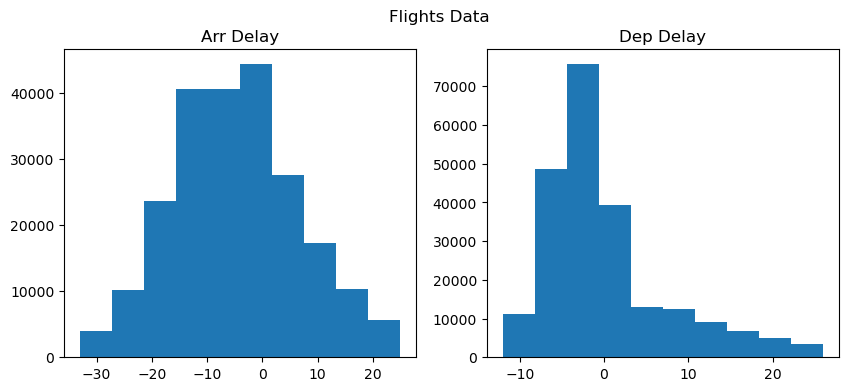

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].hist(df_flights['ArrDelay'])
ax[0].set_title('Arr Delay')

ax[1].hist(df_flights['DepDelay'])
ax[1].set_title('Dep Delay')

plt.suptitle('Flights Data')
plt.show()

In [59]:
# What are the average (mean) departure and arrival delays?

In [60]:
dep_delay_mean = df_flights['DepDelay'].mean()
arr_delay_mean = df_flights['ArrDelay'].mean()

In [61]:
print(dep_delay_mean)
print(arr_delay_mean)

0.059951536316581885
-4.706825895999073


In [62]:
# How do the carriers compare in terms of arrival delay performance?

In [63]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


In [64]:
df_flights['Carrier'].unique()

array(['DL', 'WN', 'AS', 'EV', 'AA', 'OO', 'US', 'UA', 'FL', 'B6', 'VX',
       'MQ', '9E', 'YV', 'F9', 'HA'], dtype=object)

In [71]:
# Five top carriers in respect of arrival delay

df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values()[:5]

Carrier
UA   -7.577000
9E   -7.552932
EV   -6.556518
DL   -6.435111
B6   -5.737301
Name: ArrDelay, dtype: float64

In [72]:
# Is there a noticable difference in arrival delays for different days of the week?

In [73]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


In [76]:
df_flights.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()

DayOfWeek
6   -5.968846
2   -5.252219
7   -5.164211
1   -4.613807
3   -4.507353
5   -4.102935
4   -3.538979
Name: ArrDelay, dtype: float64

In [77]:
# Which departure airport has the highest average departure delay?

In [78]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


In [83]:
grouped_data = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending = False)

In [84]:
max_airport = grouped_data.idxmax()  
max_delay = grouped_data.max()       

print(f"Airport with the highest delay: {max_airport}, Delay: {max_delay}")

Airport with the highest delay: Chicago Midway International, Delay: 4.328027139874739


In [85]:
# Do late departures tend to result in longer arrival delays than on-time departures?

In [86]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


In [87]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [88]:
# creating another column for Departure Status like if the value Departure delay is less then 0 then we consider it on time
# else late

df_flights['DepartureStatus'] = df_flights['DepDelay'].apply(lambda x: 'Late' if x > 0 else 'On-Time')

In [89]:
arrival_delay_analysis = df_flights.groupby('DepartureStatus')['ArrDelay'].mean()
print(arrival_delay_analysis)

DepartureStatus
Late       2.474304
On-Time   -7.973100
Name: ArrDelay, dtype: float64


In [90]:
# Which route (from origin airport to destination airport) has the most late arrivals?

In [91]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,DepartureStatus
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0,1824,13,0,0,Late
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0,740,22,1,0,Late
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0,1614,-7,0,0,On-Time
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0,728,-9,0,0,On-Time
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0,1210,-3,0,0,On-Time


In [97]:
df_flights['ArrivalStatus'] = df_flights['ArrDelay'].apply(lambda x: 'Late' if x > 0 else 'On-Time')

In [99]:
grouped_data = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrivalStatus'].count().sort_values(ascending = False)
print(grouped_data)

OriginAirportName                DestAirportName                    
San Francisco International      Los Angeles International              796
Los Angeles International        San Francisco International            685
Honolulu International           Kahului Airport                        637
Kahului Airport                  Honolulu International                 627
McCarran International           Los Angeles International              591
                                                                       ... 
Lambert-St. Louis International  Cleveland-Hopkins International          1
Kahului Airport                  Ted Stevens Anchorage International      1
Indianapolis International       Logan International                      1
Charlotte Douglas International  General Mitchell International           1
Palm Beach International         Chicago Midway International             1
Name: ArrivalStatus, Length: 2480, dtype: int64


In [100]:
route_with_most_late_arrivals = grouped_data.head(1)
print(route_with_most_late_arrivals)

OriginAirportName            DestAirportName          
San Francisco International  Los Angeles International    796
Name: ArrivalStatus, dtype: int64


In [101]:
# Which route has the highest average arrival delay?

In [103]:
grouped_data = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending = False)
print(grouped_data.head(1))

OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    23.0
Name: ArrDelay, dtype: float64
